<img alt="Logo ITA" width="500" src="https://logodownload.org/wp-content/uploads/2018/01/ita-logo.png">

*Autor do material:* **Thiago Gonçalves Guimarães Lopes**

*Desenvovlido para a Disciplina:* **CT-600 Estágio Docência**

#### **Aula 3 - Árvores de Decisão**

---

# Fundamento da Árvore de Decisões, Floresta Aleatória e Árvores Extremamente Aleatórias

---

Árvores de decisão é um modelo de decisão comumente utilizado em problemas de classificação. Entretanto estes também são empregados em problemas de regressão [1,2,3].


Tomando como exemplo a Figura abaixo, o funcionamento deste algoritmo pode ser resumido como uma divisão de grupos. Elucidando a mesma, é possível avaliar se o dia está favorável a um jogo de tênis analisando aspectos do clima.

<img alt="Logo ITA" width="500" src="http://web.tecnico.ulisboa.pt/ana.freitas/bioinformatics.ath.cx/bioinformatics.ath.cx/uploads/RTEmagicC_arv_dec4_01.gif.gif">

Em problemas mais complexos, trabalhados durante a parte prática, a árvore de decisão engloba todas as
características do conjunto de treino, podendo dividir a mesma característica em mais de um sub grupo para realizar a sua construção [1].

A qualidade do resultado obtido por este método utiliza a teoria da informação, também conhecida como teoria de ganho. Tal princípio se baseia no fato de que o conjunto de dados estará melhor definido ou puro, depois que ele passa para o próximo nodo, isto é, após a divisão. Então, a cada iteração, o algoritmo escolhe a característica que fornece a ele melhor ganho de informação. Esse ganho, é cálculo através da Entropia de Shannon, ou simplesmente Entropia, calculada por [1,2,3,4,5]:
$$ H_i = - \sum_{i=1}^{n} P(y_i)log_2(P(y_i)) $$

onde $n$ é o número de classes, $P(y_i)$ é a probabilidade de ser a classe $y_i$ e o sinal negativo é para trazer a entropia a um valor positivo.

Durante o processo de aprendizagem, o algoritmo calcula utilizando uma característica $A$ e $B$ a entropia antes de aplicar a divisão e após ela em ambas os casos.  A entropia de ganho, definida como $H_{antes} - H_{depois}$, é calculada para avaliar qual característica é mais relevante para divisão dos dados. A que obtiver a maior entropia de ganho é então utilizada para gerar uma nova ramificação.

Outra forma de avaliar a qualidade do resultado é avaliar a pureza daquele nó, isto é, o quanto aquele grupo de amostras consegue definir uma classe [1,2,4]. Essa impureza  é calculada através do índice de Gini:
$$ G_i = 1 - \sum_{i=1}^{n}{P(y_i)}^2
$$ 
onde $P(y_i)$ é a probabilidade de cada classe.

Para esta função de custo, é calculada a impureza média dos nós. Tal valor é subtraído de $G_i$ e o atributo que obtiver maior diminuição de impureza ($G_i$ próximo de 0) é então selecionado para divisão.

Já o método Florestas Aleatórias faz parte de uma técnica conhecida como **Ensemble Learning**. Uma técnica utilizada em ML que agrupa a combinação de diversos modelos. É baseado na ideia de que juntando as previsões de diversos métodos, será obtido um resultado melhor do que utilizando somente um estimador [1].

<img alt="Logo ITA" width="500" src="https://cdn-images-1.medium.com/max/1000/0*c0Eg6-UArkslgviw.png">

É possível treinar um grupo de Árvores de Decisões que utilizam critérios e amostrasdiferentes, obtendo-se resultados distintos para cada árvore. Quando um novo dado ésubmetido a teste, é realizado uma votação entre estes modelos treinados e a classe maisvotada é então selecionada [1,2,3]. 

Esse agrupamento de Árvores de Decisões é denominado de Árvores Aleatórias [3,6]. Como dito anteriormente, este modelo é totalmente baseado na construção de diversas árvores de decisão e em seu agrupamento. Como o nome sugere, as árvores são criadas usando critérios aleatórios de divisão. Entretanto o limiar de divisão do nó é calculado para cada árvore.

A alta variância destes estimadores tende a gerar um sobreajuste sobre os dados. Todavia, a utilização da aleatoriedade para criação das árvores soluciona este problema. Utiliza-se uma média entre os estimadores para reduzir o erro gerado [6]. 

No modelo de Árvores Extremamente Aleatórias, outro **Ensemble Method**, também utiliza como base as Árvores de Decisões. Segundo [1,3], este método segue o mesmo procedimento da Floresta Aleatória, porém além de escolher uma característica aleatória para dividir um nó das árvores de decisão, o limiar desta característica também é escolhido aleatoriamente.

**Referência:**
* [1] GÉRON, A. **Mãos à Obra Aprendizado de Máquina com Scikit-Learn e TensorFlow: Conceitos, ferramentas e técnicas para construção de sistemas inteligentes**. [S.l.]: Alta Books, 2019. Traduzido por Rafael Contatori. ISBN 9788550803814.
* [2] SCIKIT-LEARN. **Decision Trees**. 2020. Disponível
em: <https://scikit-learn.org/stable/modules/tree.html>
* [3] BIGOTO, M. A. R. **Implementação de modelos de machine learning para predição de temperaturas críticas de supercondutores**. 2020. Disponível em: <https://github.com/muriloafonso/TG_ENG_FISICA>.
* [4] FACELI, K. et al. **Inteligência artificial: Uma abordagem de aprendizado de máquina**. 2011.
* [5] LOPES, T. G. G. **Análise comparativa de modelos de Machine Learning na predição de Câncer de pele**. 2020. Disponível em: <https://github.com/thiagolopes97/TCC-ThiagoLopes/blob/main/TCC_ThiagoLopes_Final.pdf>.
* [6] SCIKIT-LEARN. **Ensemble Method**. 2020. Disponível
em: <https://scikit-learn.org/stable/modules/ensemble.html>

# Árvore de Decisões - Previsões de Diabetes na região de df (India)

In [27]:
# Importação das bibliotecas
import pandas as pd # Biblioteca para manipulação de planilhas
from sklearn.tree import DecisionTreeClassifier # Import da função Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import do separador de dataset (train_test_split)
from sklearn import metrics #Import das métricas
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [28]:
'''Sobre o dataset: Esse dataset foi obtido pelo National Institute pf Diabetes and Digestive and Kidney Diseases.
O dataset recolheu diversos dados da população indígena para treinar um algoritmo tentando prever se o indivíduo
terá ou não diabetes. No caso deste datase, todas as pacientes são mulheres acima de 21 anos. '''
# load do dataset
df = pd.read_csv("https://raw.githubusercontent.com/thiagolopes97/ITA/main/CT-600%20Est%C3%A1gio%20Doc%C3%AAncia/dataset/diabetes.csv")
df.columns = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [29]:
# Informações computacionais a respeito do dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [30]:
# Análise das propriedades estatísticas do dataset
'''
Count = Soma total dos valores
Mean  = Média simples
Std   = Desvio Padrão
Min   = Menor valor
25%   = 1º Quartil
50%   = 2º Quartil (Mediana)
75%   = 3º Quartil
Max   = Maior valor
'''
df.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [31]:
# Verificação se existe alguma informação faltando no Dataset
df.isnull().sum()

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64

In [32]:
#Divisão do dataset em Atributos e Resultado
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = df[feature_cols] # Features - Atributos
y = df.label # Target variable - Resultado

In [33]:
# Divisão do dataset - Split dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
# 70% training e 30% test

In [34]:
# Chamando a função Decision Tree classifer
DecTree = DecisionTreeClassifier()

# Treinando o modelo
DecTree.fit(X_train,y_train)

# Testando o modelo
y_pred = DecTree.predict(X_test)

In [35]:
# Cálculo da accurárcia do modelo - Accuracy 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Cálculo da  matriz de confusão - Confusion Matrix

dec_tree_cnf = metrics.confusion_matrix(y_test, y_pred)
dec_tree_cnf

Accuracy: 0.6926406926406926


array([[116,  30],
       [ 41,  44]])

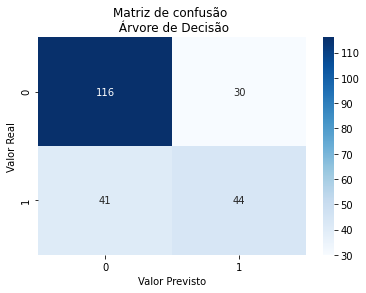

In [36]:
sns.heatmap(dec_tree_cnf,annot=True, cmap="Blues" ,fmt='g')

plt.title("Matriz de confusão \n Árvore de Decisão")
plt.ylabel("Valor Real")
plt.xlabel("Valor Previsto")

plt.show()

In [37]:
# Bibliotecas utilizada para gerar as imagens das árvores de decisão

!pip install graphviz -q
!pip install pydotplus -q

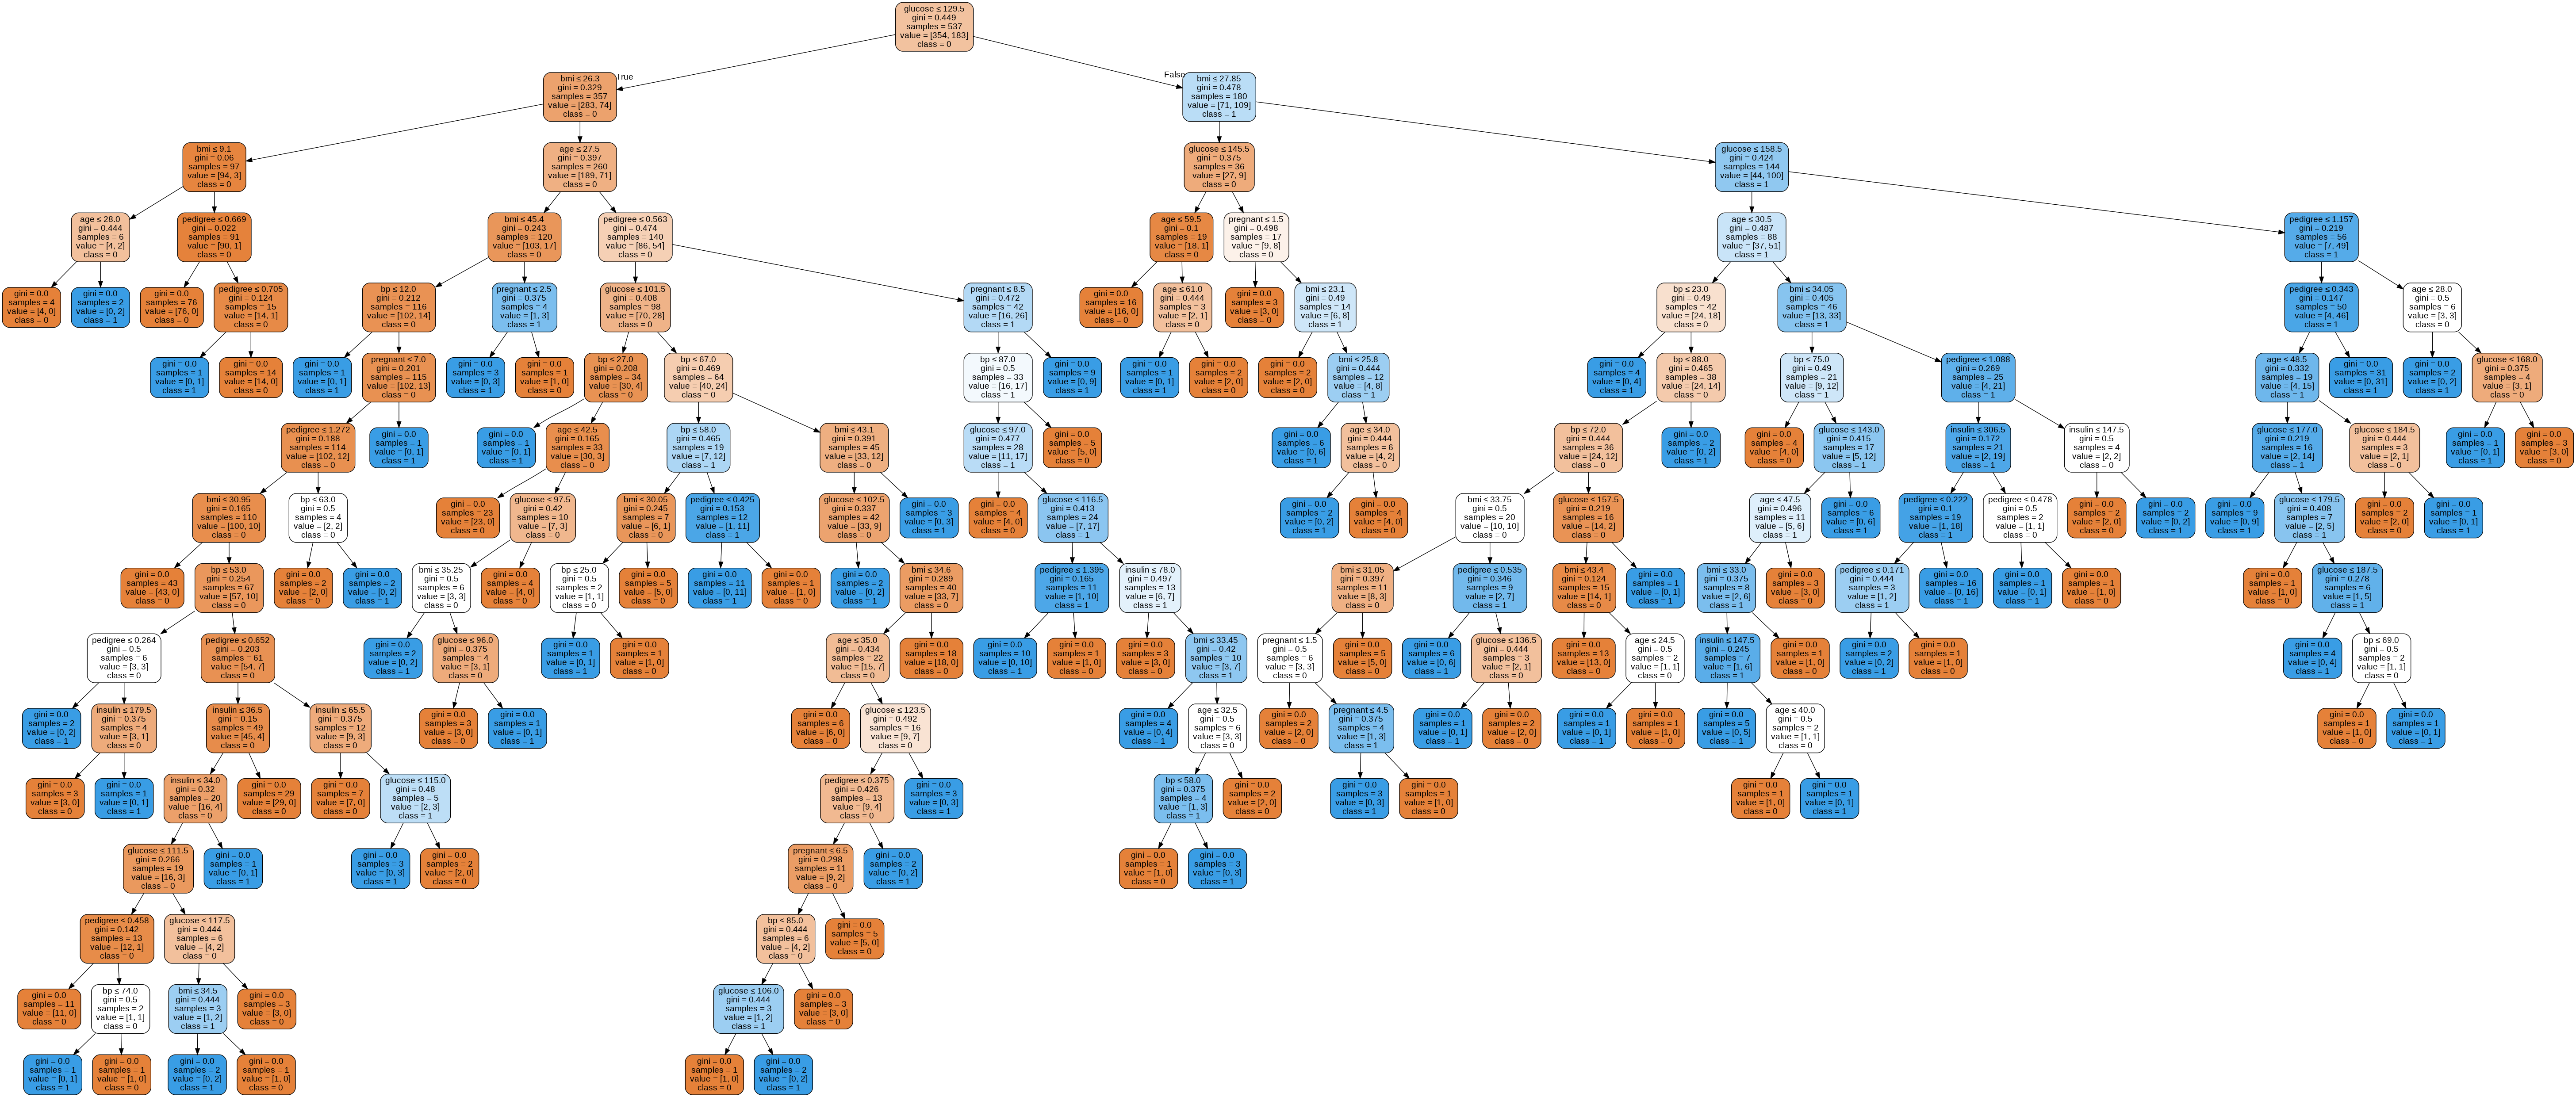

In [38]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

# Código para plotagem da árvore de decisões abaixo
dot_data = StringIO()
export_graphviz(DecTree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 

# Criação da imagem em formato png
graph.write_png('diabetes.png')
Image(graph.create_png())

Accuracy: 0.7878787878787878


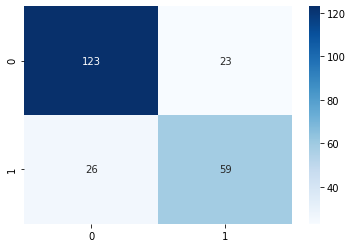

In [39]:
# Se quiser criar uma árvore mais compacta, é necessário determinar alguns parâmetros na função 
# DecisionTree, como no código abaixo...
# Para escolher uma divisão melhor, vamos escolher qual método a árvore irá utilizar para separar
# as variáveis e o tamanho máximo de ramificações.

DecTree_B = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Treinando o modelo Decision Tree Classifer
DecTree_B.fit(X_train,y_train)

# Testando o modelo
y_pred = DecTree_B.predict(X_test)

# Model Accuracy/ Confusion Matrix - Quantas vezes ele acertou? Quais a distribuição verdadeiro e falso
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

dec_tree_b_cnf = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(dec_tree_b_cnf,annot=True, cmap="Blues" ,fmt='g')

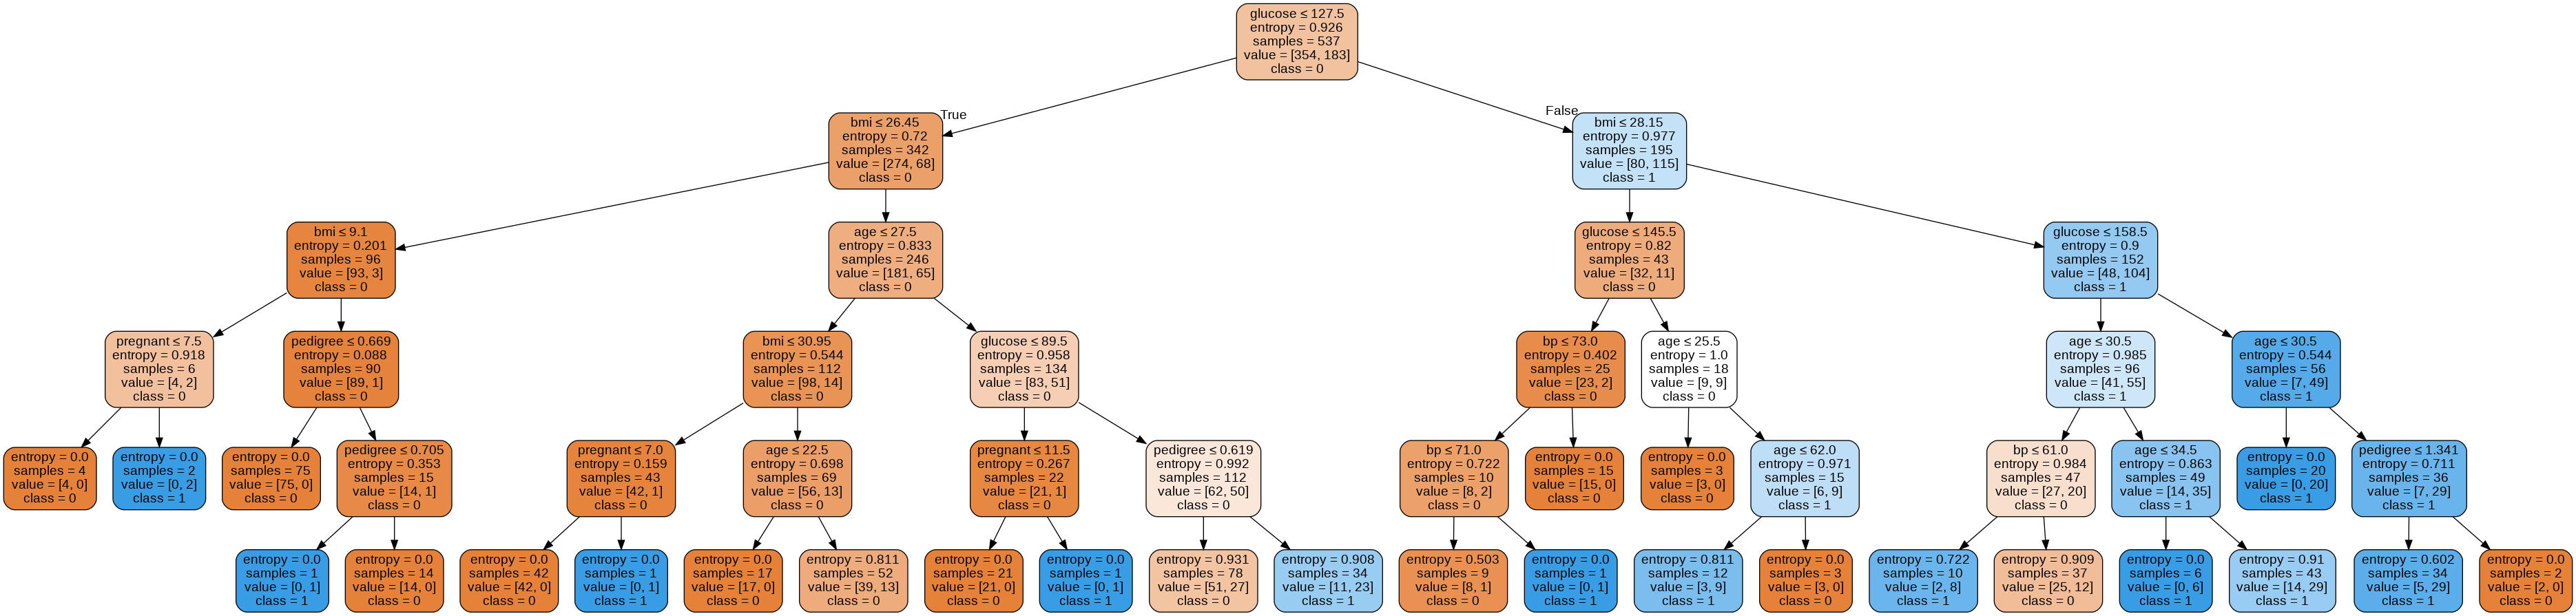

In [40]:
# Plotagem da árvore de decisões 

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(DecTree_B, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

Recomendação de leitura sobre Árvore de Decisões e esse Dataset:
https://minerandodados.com.br/arvores-de-decisao-conceitos-e-aplicacoes/

# Floresta Aleatória e Árvores Extremamente Aleatórias - Previsões de Diabete

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Accuracy: 0.8051948051948052


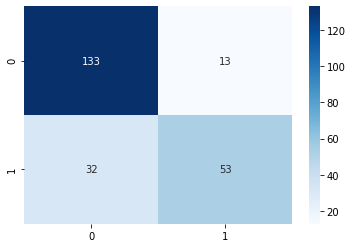

In [41]:
from sklearn import metrics
import pandas as pd
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt



RandFor = RandomForestClassifier()
print(RandFor)

# Treinando nosso modelo logístico
RandFor.fit(X_train,y_train)

# Testeando a predição
y_pred = RandFor.predict(X_test)

# Model Accuracy/ Confusion Matrix - Quantas vezes ele acertou? Quais a distribuição verdadeiro e falso
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

rand_for_cnf = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(rand_for_cnf,annot=True, cmap="Blues" ,fmt='g')

Accuracy: 0.8051948051948052


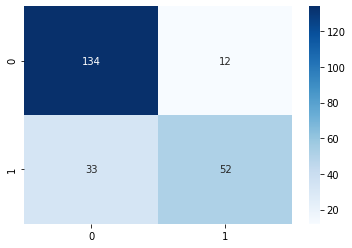

In [42]:
# Realizar o mesmo procedimento de especificação de parâmetros

RandFor_B = RandomForestClassifier(criterion="entropy", max_depth=15, n_estimators=300)

# Treinando o modelo Decision Tree Classifer
RandFor_B.fit(X_train,y_train)

# Testando o modelo
y_pred = RandFor_B.predict(X_test)

# Model Accuracy/ Confusion Matrix - Quantas vezes ele acertou? Quais a distribuição verdadeiro e falso
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

rand_for_b_cnf = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(rand_for_b_cnf,annot=True, cmap="Blues" ,fmt='g')

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)
Accuracy: 0.7922077922077922


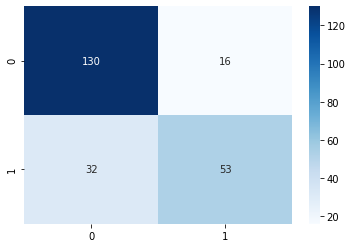

In [49]:
import pandas as pd
import sklearn.metrics as metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt


ExtraTrees = ExtraTreesClassifier()
print(ExtraTrees)

# Treinando nosso modelo logístico
ExtraTrees.fit(X_train,y_train)

# Testeando a predição
y_pred = ExtraTrees.predict(X_test)

# Model Accuracy/ Confusion Matrix - Quantas vezes ele acertou? Quais a distribuição verdadeiro e falso
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

extra_tree_cnf = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(extra_tree_cnf,annot=True, cmap="Blues" ,fmt='g')

Accuracy: 0.7705627705627706


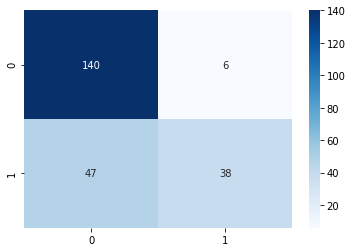

In [44]:
ExtraTrees_B = ExtraTreesClassifier(criterion="entropy", max_depth=5, n_estimators=150)

# Treinando o modelo Decision Tree Classifer
ExtraTrees_B.fit(X_train,y_train)

# Testando o modelo
y_pred = ExtraTrees_B.predict(X_test)

# Model Accuracy/ Confusion Matrix - Quantas vezes ele acertou? Quais a distribuição verdadeiro e falso
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
extra_tree_b_cnf = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(extra_tree_b_cnf,annot=True, cmap="Blues" ,fmt='g')

Accuracy: 0.7835497835497836


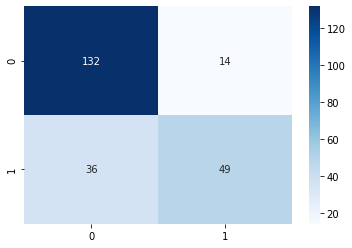

In [45]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()

# Treinando nosso modelo logístico
LogReg.fit(X_train,y_train)

# Testeando a predição
y_pred = LogReg.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
log_reg_cnf = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(log_reg_cnf,annot=True, cmap="Blues" ,fmt='g')

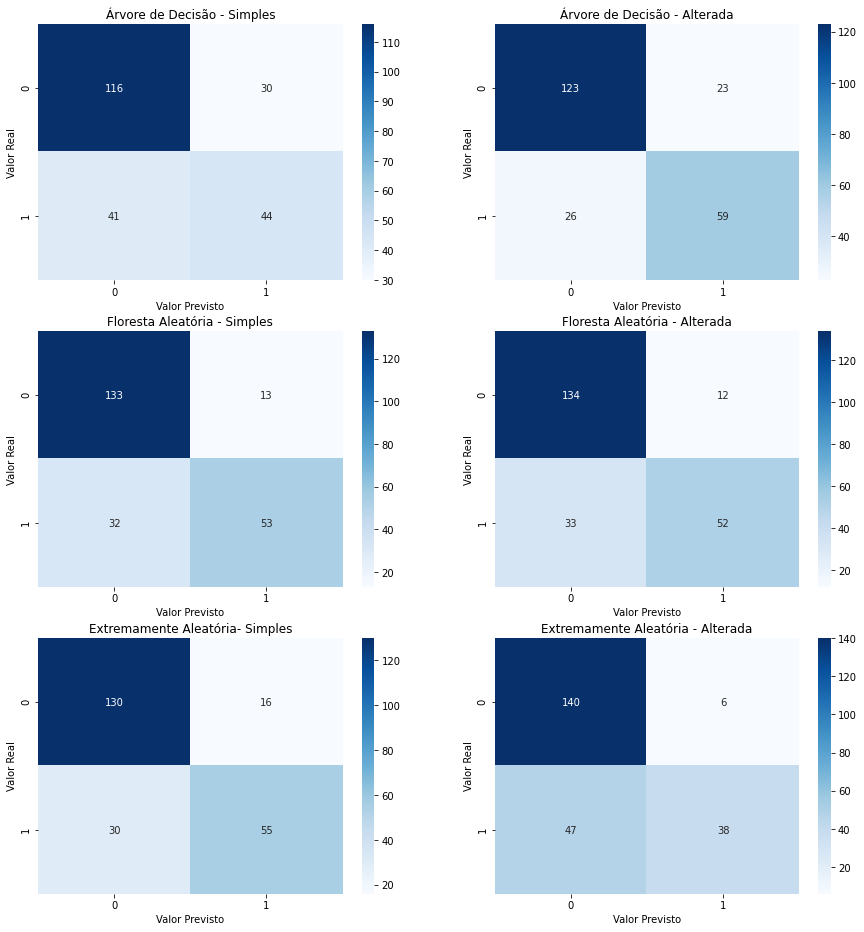

In [46]:
plt.figure(figsize=(15,16))

# Creando o heatmap com a matriz de confusão
plt.subplot(3,2,1)
sns.heatmap(dec_tree_cnf,annot=True, cmap="Blues" ,fmt='g')
plt.title("Árvore de Decisão - Simples")
plt.ylabel("Valor Real")
plt.xlabel("Valor Previsto")

plt.subplot(3,2,2)
sns.heatmap(dec_tree_b_cnf,annot=True, cmap="Blues" ,fmt='g')
plt.title("Árvore de Decisão - Alterada")
plt.ylabel("Valor Real")
plt.xlabel("Valor Previsto")

plt.subplot(3,2,3)
sns.heatmap(rand_for_cnf,annot=True, cmap="Blues" ,fmt='g')
plt.title("Floresta Aleatória - Simples")
plt.ylabel("Valor Real")
plt.xlabel("Valor Previsto")

plt.subplot(3,2,4)
sns.heatmap(rand_for_b_cnf,annot=True, cmap="Blues" ,fmt='g')
plt.title("Floresta Aleatória - Alterada")
plt.ylabel("Valor Real")
plt.xlabel("Valor Previsto")

plt.subplot(3,2,5)
sns.heatmap(extra_tree_cnf,annot=True, cmap="Blues" ,fmt='g')
plt.title("Extremamente Aleatória- Simples")
plt.ylabel("Valor Real")
plt.xlabel("Valor Previsto")

plt.subplot(3,2,6)
sns.heatmap(extra_tree_b_cnf,annot=True, cmap="Blues" ,fmt='g')
plt.title("Extremamente Aleatória - Alterada")
plt.ylabel("Valor Real")
plt.xlabel("Valor Previsto")

plt.show()